<a href="https://colab.research.google.com/github/yuasa-souta/Prog2_11th/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# turtle をColab環境で利用できるようにするため，Colabファイルを開いたときに一度だけ実行する
!pip3 install ColabTurtlePlus

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as pltc
import random
from ColabTurtlePlus.Turtle import *

Put clearscreen() as the first line in a cell (after the import command) to re-run turtle commands in the cell


In [4]:
Ans = [[[3,3,3],[-1,-1,-1],[-1,-1,-1]],
      [[-1,-1,-1],[3,3,3],[-1,-1,-1]],
      [[-1,-1,-1],[-1,-1,-1],[3,3,3]],
      [[3,-1,-1],[3,-1,-1],[3,-1,-1]],
      [[-1,3,-1],[-1,3,-1],[-1,3,-1]],
      [[-1,-1,3],[-1,-1,3],[-1,-1,3]],
      [[3,-1,-1],[-1,3,-1],[-1,-1,3]],
      [[-1,-1,3],[-1,3,-1],[3,-1,-1]]]

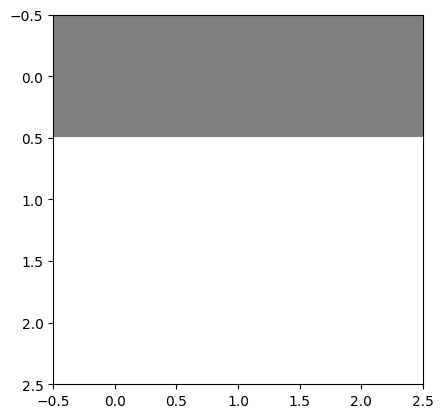

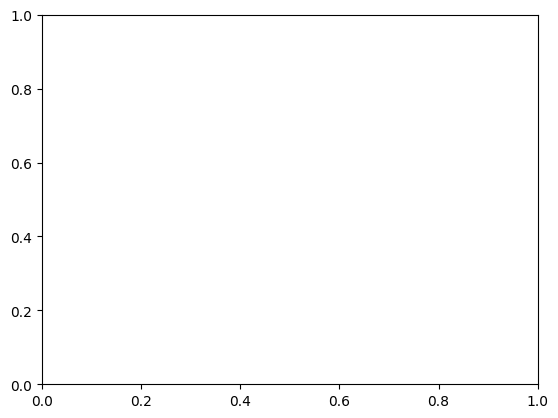

In [ ]:
def game(A,nx,ny,i):
  if i%2 == 0:
    x = 1
  else:
    x = 2
  A[ny][nx] = x
def judge(A,Ans):
  winer = '0'
  A = print(np.where(A == 1, 3, -1))
  B = print(np.where(A == 2, 3, -1))
  for i in range(8):
    # 一致判定
    flagA =  np.allclose(A, Ans[i])
    flagB =  np.allclose(B, Ans[i])
    if flagA == True:
      winer = '1'
    elif flagB == True:
      winer = '2'
  return winer

n = 3
board = np.zeros([n, n], dtype=bool)

color_list = ['white', 'gray', 'black']
cmap = LinearSegmentedColormap.from_list('cmap', color_list)
norm = plt.Normalize(0, 2)

#for i in range(9):
#  winer = judge(board,Ans)
#  plt.imshow(board, cmap=cmap, norm=norm)
#  plt.pause(.01)
#  plt.cla()
# nx = int(input('何列目？'))
#  ny = int(input('何行目？'))
#  board = game(board,nx,ny,i)
board[0] = 2
plt.imshow(board, cmap=cmap, norm=norm)
plt.pause(.01)
plt.cla()

In [8]:
gameBoard = [0,1,2,3,4,5,6,7,8] # ゲームに利用する盤面
winer = ['drow','win','lose']
g = 0
# 盤面を3x3で表示する
def displayBoard():
    # gameBoardの要素を1つずつ表示
    for i in range(0, len(gameBoard)):
        if(i%3 == 2): # 3回に1回は改行
            print(gameBoard[i]) # 改行する
        else :
            print(gameBoard[i], end="") # 改行しない
# ターンを進める
def inputBoard(playerType):
    # 1.座標を入力させる
    if(playerType == "o"):  # o が渡されたら座標を入力
        tgt = int(input("0~8の座標を入れてください: "))
    else: # xが渡されたらランダムで座標を入力
        tgt = random.randint(0,8)

    # 2.入力座標に 'o'か 'x' が入っていないことを確認
    if(gameBoard[tgt] == 'o' or gameBoard[tgt] == 'x'):
        inputBoard(playerType)

    # 3.gameBoardに反映
    else:
        gameBoard[tgt] = playerType
def judge():
  if gameBoard[0] == gameBoard[1] == gameBoard[2] or gameBoard[3] == gameBoard[4] == gameBoard[5] or gameBoard[6] == gameBoard[7] == gameBoard[8] or gameBoard[0] == gameBoard[3] == gameBoard[6] or gameBoard[1] == gameBoard[4] == gameBoard[7] or gameBoard[2] == gameBoard[5] == gameBoard[8] or gameBoard[0] == gameBoard[4] == gameBoard[8] or gameBoard[2] == gameBoard[4] == gameBoard[6] == 'o':
    return 1
  elif gameBoard[0] == gameBoard[1] == gameBoard[2] or gameBoard[3] == gameBoard[4] == gameBoard[5] or gameBoard[6] == gameBoard[7] == gameBoard[8] or gameBoard[0] == gameBoard[3] == gameBoard[6] or gameBoard[1] == gameBoard[4] == gameBoard[7] or gameBoard[2] == gameBoard[5] == gameBoard[8] or gameBoard[0] == gameBoard[4] == gameBoard[8] or gameBoard[2] == gameBoard[4] == gameBoard[6] == 'x':
    return 2
  return 0
def check():
  a = 0
  for b in range(len(gameBoard)):
    if type(gameBoard[b]) is str:
      a += 1
  if a == 9:
    return 1
  return 0

# ゲームの進行

displayBoard()
while True:
  inputBoard('o') # ユーザーのターン
  displayBoard()
  g = judge()
  if check() == 1:
    print(winer[int(g)])
    break
  print('=====')
  inputBoard('x') # CPUのターン
  displayBoard()
  g = judge()
  if g != 0:
    print(winer[int(g)])
    break



012
345
678
0~8の座標を入れてください: 4
012
3o5
678
=====
x12
3o5
678
0~8の座標を入れてください: 1
xo2
3o5
678
=====
xo2
3o5
6x8
0~8の座標を入れてください: 3
xo2
oo5
6x8
=====
xo2
oox
6x8
0~8の座標を入れてください: 2
xoo
oox
6x8
=====
xoo
oox
6xx
0~8の座標を入れてください: 6
xoo
oox
oxx
win


sample code
https://qiita.com/yuji96/items/bfae04a043d35260ffb1

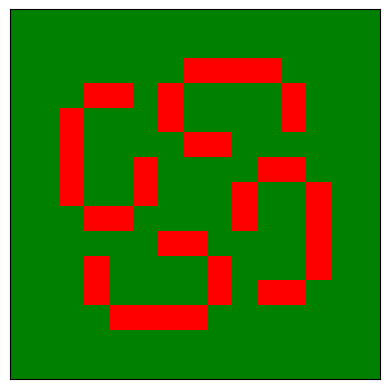

[[False False False False False False False False False False False False
  False False False]
 [False False False False False False False False False False False False
  False False False]
 [False False False False False False False  True  True  True  True False
  False False False]
 [False False False  True  True False  True False False False False  True
  False False False]
 [False False  True False False False  True False False False False  True
  False False False]
 [False False  True False False False False  True  True False False False
  False False False]
 [False False  True False False  True False False False False  True  True
  False False False]
 [False False  True False False  True False False False  True False False
   True False False]
 [False False False  True  True False False False False  True False False
   True False False]
 [False False False False False False  True  True False False False False
   True False False]
 [False False False  True False False False False 

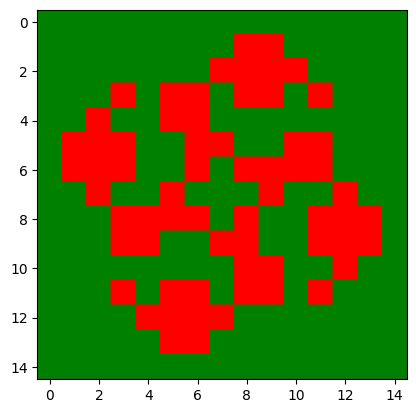

[[False False False False False False False False False False False False
  False False False]
 [False False False False False False False False  True  True False False
  False False False]
 [False False False False False False False  True  True  True  True False
  False False False]
 [False False False  True False  True  True False  True  True False  True
  False False False]
 [False False  True False False  True  True False False False False False
  False False False]
 [False  True  True  True False False  True  True False False  True  True
  False False False]
 [False  True  True  True False False  True False  True  True  True  True
  False False False]
 [False False  True False False  True False False False  True False False
   True False False]
 [False False False  True  True  True  True False  True False False  True
   True  True False]
 [False False False  True  True False False  True  True False False  True
   True  True False]
 [False False False False False False False False 

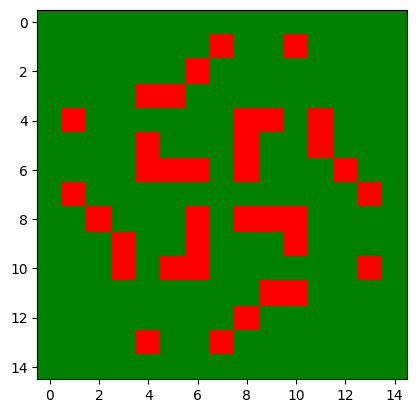

[[False False False False False False False False False False False False
  False False False]
 [False False False False False False False  True False False  True False
  False False False]
 [False False False False False False  True False False False False False
  False False False]
 [False False False False  True  True False False False False False False
  False False False]
 [False  True False False False False False False  True  True False  True
  False False False]
 [False False False False  True False False False  True False False  True
  False False False]
 [False False False False  True  True  True False  True False False False
   True False False]
 [False  True False False False False False False False False False False
  False  True False]
 [False False  True False False False  True False  True  True  True False
  False False False]
 [False False False  True False False  True False False False  True False
  False False False]
 [False False False  True False  True  True False 

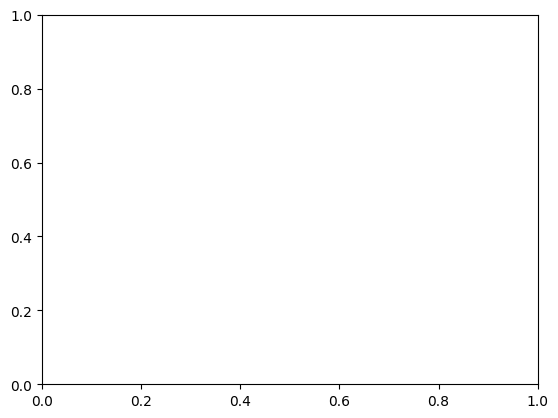

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


n = 15

cells = np.zeros([n, n], dtype=bool)

# 銀河
cells[3:9, 3:5] = True
cells[3:5, 6:12] = True
cells[-5:-3, 3:9] = True
cells[6:12, -5:-3] = True

# ランダム
# cells = np.random.randint(0, 2, (n, n), dtype=bool)


def update(old):

    @np.vectorize
    def sum_around(i, j):
        return cells[max(0, i-1):i+2, max(0, j-1):j+2].sum() - cells[i, j]

    around = np.fromfunction(sum_around, old.shape, dtype=int)
    new = np.where(old , ((2 <= around) & (around <= 3)), (around == 3))
    return new


colors = ['green', 'red']
xmas = LinearSegmentedColormap.from_list('xmas', colors)
norm = plt.Normalize(0, 1)

plt.tick_params(labelbottom=False, labelleft=False,
                bottom=False, left=False)

for i in range(3):
#while True:
    cells = update(cells)

    plt.imshow(cells, cmap=xmas, norm=norm)
    plt.pause(.01)
    plt.cla()
    print(cells)
